## **App1 Object Detection Assitant Application**

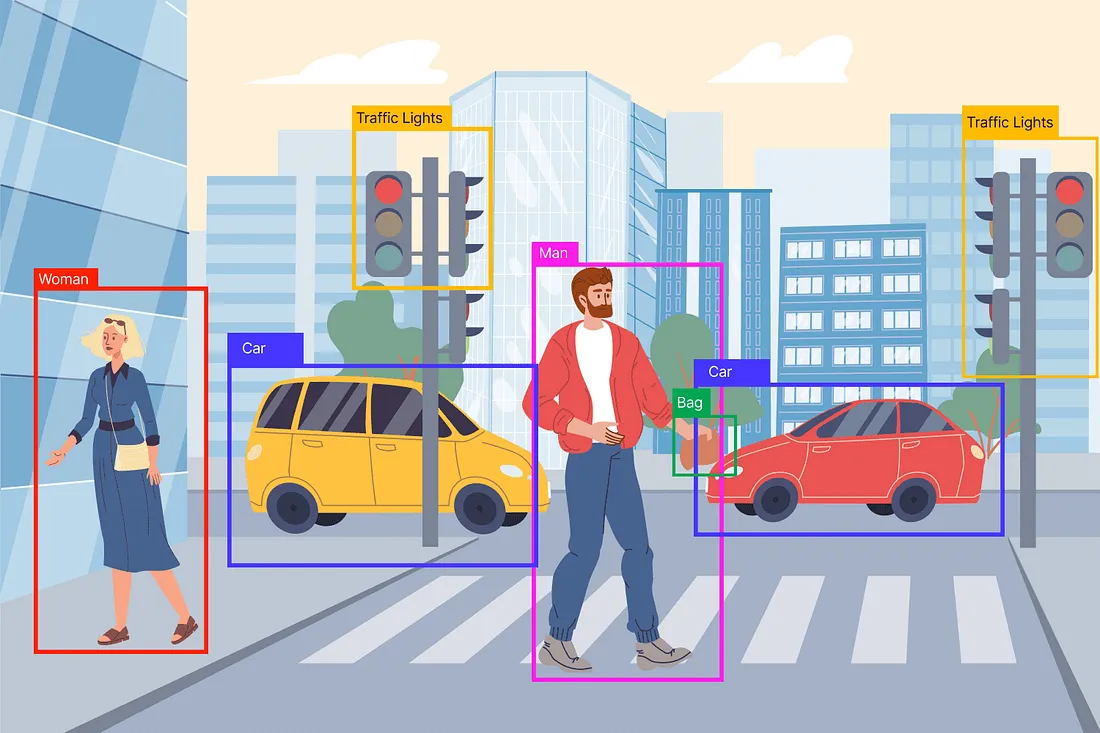

###**Setting Up the Environment**

In [ ]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

### **helpers functions**

**The function processes these inputs to create a visual representation of the object detection results.**

In [ ]:
def render_results_in_image(in_pil_img, in_results):
    plt.figure(figsize=(16, 10))
    plt.imshow(in_pil_img)

    ax = plt.gca()

    for prediction in in_results:  # add bounding boxes

        x, y = prediction['box']['xmin'], prediction['box']['ymin']
        w = prediction['box']['xmax'] - prediction['box']['xmin']
        h = prediction['box']['ymax'] - prediction['box']['ymin']

        ax.add_patch(plt.Rectangle((x, y),  #put a rectangle around the objects
                                   w,
                                   h,
                                   fill=False,
                                   color="green",
                                   linewidth=2))
        ax.text(
           x,
           y,
           f"{prediction['label']}: {round(prediction['score']*100, 1)}%",
           color='red'
        )

    plt.axis("off")

    # Save the modified image to a BytesIO object
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png',
                bbox_inches='tight',
                pad_inches=0)
    img_buf.seek(0)
    modified_image = Image.open(img_buf)

    # Close the plot to prevent it from being displayed
    plt.close()

    return modified_image

###**Object Detection Model using Pipeline Transformers**

using : facebook/detr-resnet-50

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

model = pipeline("object-detection", model="facebook/detr-resnet-50")

In [ ]:
from PIL import Image

raw_image = Image.open('/content/battlefield-4-city-2560-x-1600-b1ivhg025ducvcup.jpg')
raw_image.resize((569, 720))

In [ ]:
pipeline_output = model(raw_image)
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

processed_image

###**Web App with Gradio**

In [11]:
import os
import gradio as gr

def get_pipeline_prediction(pil_image):

    pipeline_output = model(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

**define Gardio**

In [12]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [ ]:
server_port = int(os.environ.get('PORT1', '7860')) # Use os.environ.get to provide a default value--> Convert default to string

demo.launch(share=True, server_port=server_port)

In [14]:
demo.close()

Closing server running on port: 7860


###**Creating an AI-powered Assistant**

In [15]:
!pip install inflect
!pip install phonemizer
!sudo apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 1s (983 kB

In [16]:
!pip uninstall -y phonemizer
!pip install phonemizer --no-cache-dir
!pip install espeak-ng

Found existing installation: phonemizer 3.3.0
Uninstalling phonemizer-3.3.0:
  Successfully uninstalled phonemizer-3.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 22.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement espeak-ng (from versions: none)
ERROR: No matching distribution found for espeak-ng


In [18]:
import inflect
import phonemizer

**summarize_predictions_natural_language function**

* which generates a natural language description of object detection results by analyzing a list of predictions, each containing a label indicating the type of object detected

In [20]:
def summarize_predictions_natural_language(predictions):
    summary = {}
    p = inflect.engine()

    for prediction in predictions:
        label = prediction['label']
        if label in summary:
            summary[label] += 1
        else:
            summary[label] = 1

    result_string = "In this image, there are "
    for i, (label, count) in enumerate(summary.items()):
        count_string = p.number_to_words(count)
        result_string += f"{count_string} {label}"
        if count > 1:
          result_string += "s"

        result_string += " "

        if i == len(summary) - 2:
          result_string += "and "

    # Remove the trailing comma and space
    result_string = result_string.rstrip(', ') + "."

    return result_string

In [ ]:
pipeline_output

In [22]:
text = summarize_predictions_natural_language(pipeline_output)
text

'In this image, there are four boats two airplanes and one person.'

**Load OD model**
* kakao-enterprise/vits-ljs

In [23]:
tts_model = pipeline("text-to-speech", model="kakao-enterprise/vits-ljs")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [24]:
text_from_image = tts_model(text)
# text_from_image

**Ipython to show speech**

In [25]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(text_from_image["audio"][0],
             rate=text_from_image["sampling_rate"])